In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

[0, 1000, 2000] [-250, -461.41397531924974, -999.7655036914024]


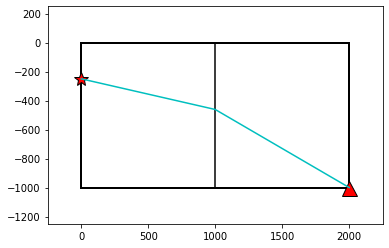

In [2]:
s1 = [0,-250] # meter
s2 = [0,-633] # meter
s3 = [1000, 0] # meter
r1 = [2000, -1000] # meter


t_obs11 = 3.020 # second
t_obs21 = 2.896 # second
t_obs31 = 1.139 # second

raypath_x = np.zeros(3)
raypath_y = np.zeros(3)
error_min = float('inf')

def panjang_raypath(s,r):
    l_sr = np.sqrt((r[0] - s[0])**2 + (r[1] - s[1])**2) # meter
    return l_sr

l11 = panjang_raypath(s1,r1)
l21 = panjang_raypath(s2,r1)
l31 = panjang_raypath(s3,r1)

# model referensi (V0) # m/s
v0 = ((l11/t_obs11)+(l21/t_obs21)+(l31/t_obs31))/3

# waktu tempuh kalkulasi (t_cal) # second
t_cal11 = l11/v0
t_cal21 = l21/v0
t_cal31 = l31/v0

# waktu tunda # (d_t) second
d_t11 = t_obs11-t_cal11
d_t21 = t_obs21-t_cal21
d_t31 = t_obs31-t_cal31

# persamaan matriks tomografi
A = np.array([[l11/2, l11/2], [l21/2, l21/2], [0, l31]])
d = np.array([d_t11, d_t21, d_t31])

# X = (A^T A)^-1 A d
X = (np.linalg.inv(np.transpose(A).dot(A)).dot(np.transpose(A))).dot(d)

d_s1 = X[0]
d_s2 = X[1]

# V >>>
d_v1 = (-d_s1*(v0**2))/(1+(d_s1*v0))
d_v2 = (-d_s2*(v0**2))/(1+(d_s2*v0))

v1 = v0+d_v1 # m/s
v2 = v0+d_v2 # m/s
velocity = np.array([v1, v2])

# Ray tracing shooting
sudut_datang = np.arange(0, 90, 0.01)
bataslapisan_x = 1000

dx=500
for i in range(len(sudut_datang)):
    dyy = np.tan(np.deg2rad(sudut_datang[i]))*dx

    if s1[1] > r1[1]:
        bataslapisan_y = s1[1] - dyy
    else:
        bataslapisan_x = s1[1] + dyy

    sudut_transmisi = np.sin(np.deg2rad(sudut_datang[i])) * (v2 / v1)
    dyy = np.tan(sudut_transmisi)*dx

    if s1[1] > r1[1]:
        receiver_temp_y = s1[1] - dyy
    else:
        receiver_temp_y = s1[1] + dyy
    error_dist = np.sqrt((r1[0] - r1[0])**2 + (receiver_temp_y - r1[1])**2)

    if error_dist < error_min:
        error_min = error_dist
        raypath_x = [s1[0], bataslapisan_x, r1[0]]
        raypath_y = [s1[1], bataslapisan_y, receiver_temp_y]

# Time calculation
time_calculation = 0
for i in range(len(raypath_x)-1):
    time_calculation += np.sqrt((raypath_x[i] - raypath_x[i+1])**2 + (raypath_y[i] - raypath_y[i+1])**2) / velocity[i]
    
print(raypath_x,raypath_y)

plt.plot(s1[0],s1[1], marker="*", color="red", markersize=15, markeredgecolor='black')
plt.plot(r1[0],r1[1], marker="^", color="red", markersize=15, markeredgecolor='black')
rectangle = patches.Rectangle((0, -1000), 2000, 1000, fc="none", edgecolor='black', linewidth=2)
plt.gca().add_patch(rectangle)

plt.vlines(x=1000, ymin=-1000, ymax=0, color='black')

plt.plot(raypath_x,raypath_y,'c')

plt.xlim(-250, 2250)
plt.ylim(-1250, 250)
plt.show()

In [3]:
v2

1241.627359414482

0.24253562503633297


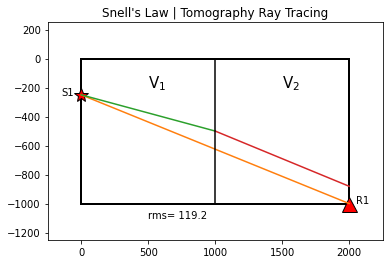

In [4]:
titik_gerak = [1000, -500]

# Hitung panjang sisi tegak (y)
y = abs(titik_gerak[1] - s1[1])

# Hitung panjang sisi miring (hypotenuse)
hypotenuse = math.sqrt((titik_gerak[0] - s1[0])**2 + (titik_gerak[1] - s1[1])**2)

# Hitung sin(theta)
sin_theta = y / hypotenuse
print(sin_theta)
# Sin(theta) dari perhitungan sebelumnya

# Hitung sin(theta2) sesuai dengan hukum Snellius
sin_theta2 = (v2 / v1) * -sin_theta

# Hitung panjang sisi tegak (y2)
y2 = sin_theta2 * hypotenuse

# Hitung titik koordinat y baru (titik_gerak2[1])
titik_gerak2 = [2000, s1[1] + y2]

eror = abs(r1[1] - titik_gerak2[1])

#################################################################################################
plt.plot(s1[0],s1[1], marker="*", color="red", markersize=15, markeredgecolor='black')
plt.plot(r1[0],r1[1], marker="^", color="red", markersize=15, markeredgecolor='black')
plt.plot(titik_gerak[0],titik_gerak[0])


plt.annotate("S1", xy=[s1[0]-150, s1[1]])
plt.annotate("R1", xy=[r1[0]+50, r1[1]])

plt.plot([s1[0],r1[0]], [s1[1],r1[1]])
plt.plot([s1[0],titik_gerak[0]], [s1[1],titik_gerak[1]])

plt.plot([titik_gerak[0],titik_gerak2[0]], [titik_gerak[1],titik_gerak2[1]])

plt.annotate("V$_1$", xy=[500, -200], size=15)
plt.annotate("V$_2$", xy=[1500, -200], size=15)
plt.annotate(f"rms= {np.round(eror,2)}", xy=[500, -1100])

rectangle = patches.Rectangle((0, -1000), 2000, 1000, fc="none", edgecolor='black', linewidth=2)
plt.gca().add_patch(rectangle)

plt.vlines(x=1000, ymin=-1000, ymax=0, color='black')

plt.xlim(-250, 2250)
plt.ylim(-1250, 250)
plt.title("Snell's Law | Tomography Ray Tracing")

plt.show()